# Introduction

For Project 2, I decided to try out CNN on image classification. Having to watch an anime called the "Quinsential Quintuplet" which is a show of quintuplet having to be tutored by a guy as they were having bad grades. Apprently, they can be very hard to be tell apart if they all dress the same and only the granparent have a way to tell them apart. Hence, I will only be identifying two of the sisters out of the 5 as they are more popular towards the community and there are numerous of fan arts which means more data for me. ☆*:.｡.o(≧▽≦)o.｡.:*☆


# Feature Selection ٩(◕‿◕｡)۶	

Since I have tried playing with these datasets quite a while back, I realize that training the picture as whole is 100% not the ideal kind of situation as firstly, it will take up alot of time to train each image and secondly, if the image is not consistent, the model would not even know what the user wants to detect. Hence, for that purpose, i actually have crop out features that I want the model to "see" and recognize. 

For example, Miku, 1 of the 5 sister, is always constantly wearing a headphone. Hence, I would crop the photo that is inclusive of the headphone. This way, I think that when the model is training, it will know what it needs to detect as the "focus range" is more specified.

# Data Augmentation

Despite having the community to support the show and drawing those fan arts, the good ones that I found are very limited. Hence, to artifically create more dataset, we will have to augment most of the photos we have to increase the size of the dataset. Augmenting dataset means that the traning dataset are created by modifying versions of images in the dataset.

Despite the fact that there are many ways to augment an image such as playing with the image brightness, position, aspect ratio, shifts, flips, zooms, and much more. It must be clear that the choice of the specific data augmentation techniques used for a training dataset must be chosen carefully and within the context of the training dataset and knowledge of the problem domain so that it will acutally helps you and not make things worse.

Image data augmentation is typically only applied to the training dataset.

For me, I will be trying to flip the image horizontally to pretend the image was either taken from the left or right and if I still have enough time to spare

# Importing Libraries for Data Augmentation

In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# Using ImageDataGenerator

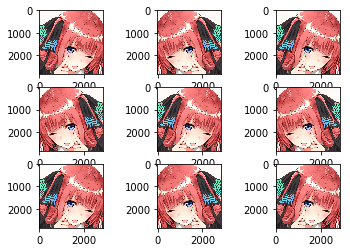

In [7]:
# load the image
img = load_img('/home/oslost/Desktop/Project_2/dataset/Nakano_Nino/68458273_p0.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
# flow Takes data & label arrays, generates batches of augmented data.
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    
    # generate batch of images
    batch = it.next()
    
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    # plot raw pixel data
    pyplot.imshow(image)
    
# show the figure
pyplot.show()

# Importing Libraries for Data Augmentation 

In [81]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import tqdm

import random
import os

# Import warnings filter
import warnings
warnings.filterwarnings("ignore")

# Using skimage (scikit-image)

Here we are going to define a few functions to do magic to our photo and create more artificial dataset. Useful!

Remeber to do:
**pip install scikit-image**

In [82]:
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

# List all the files in a folder and read them

I will be generating 1000 images based on our 2 different class folder in the dataset folder. So we perform one 1000 iterations, then choose a random file from the folder and read it with skimage.io.imread, which read images as a scipy.ndarray by default.

To be honest what I fear most is that it later on in the recognition part, only the photo that has been generated 1000 times will be overfeeding the model with only that particular photo. But I am still gonna try it anyway and sees how it goes.

# Images transformation

I will generate all 1000 image by randomising. I decided to take hold of this situation (ﾒ` ﾛ ´) hope for the best. Then later on the function will be called and apply the transformation.

# Save my ~~world~~ images

That’s it, we save our transformed scipy.ndarray as a .jpg file to the disk with the skimage.io.imsave function.
I am pretty sure my model is gonna overift regardless of how I augemnt my photo

In [84]:
# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}


# our folder path containing some images
nino_folderPath = 'dataset/Nakano_Nino'
nino_aug_folderPath = 'dataset/Nakano_Nino_Augment'

miku_folderPath = 'dataset/Nakano_Miku'
miku_aug_folderPath = 'dataset/Nakano_Miku_Augment'

nezuko_folderPath = 'dataset/Kamado_Nezuko'
nezuko_aug_folderPath = 'dataset/Kamado_Nezuko_Augment'

# the number of file to generate
num_files_desired = 1000


# loop on all files of the folder and build a list of files paths
nino_images = [os.path.join(nino_folderPath, f) for f in os.listdir(nino_folderPath) if os.path.isfile(os.path.join(nino_folderPath, f))]
miku_images = [os.path.join(miku_folderPath, f) for f in os.listdir(miku_folderPath) if os.path.isfile(os.path.join(miku_folderPath, f))]
nezuko_images = [os.path.join(nezuko_folderPath, f) for f in os.listdir(nezuko_folderPath) if os.path.isfile(os.path.join(nezuko_folderPath, f))]

#############################
# GENERATING NEZUKO FILES   #
#############################

nezuko_num_generated_files = 0
while nezuko_num_generated_files <= num_files_desired:
    # random image from the folder
    nezuko_image_path = random.choice(nezuko_images)
    # read image as an two dimensional array of pixels
    nezuko_image_to_transform = sk.io.imread(nezuko_image_path)
    
    # random num of transformations to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    
    num_transformations = 0
    nezuko_transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        nezuko_transformed_image = available_transformations[key](nezuko_image_to_transform)
        num_transformations += 1
    
    # define a name for our new file
    nezuko_new_file_path = '%s/augmented_image_%s.png' % (nezuko_aug_folderPath, nezuko_num_generated_files)

    # write image to the disk
    sk.io.imsave(nezuko_new_file_path, nezuko_transformed_image)
    nezuko_num_generated_files += 1
    print("nezuko files generated:", nezuko_num_generated_files)

###########################
# GENERATING NINO FILES   #
###########################

nino_num_generated_files = 0
while nino_num_generated_files <= num_files_desired:
    # random image from the folder
    nino_image_path = random.choice(nino_images)
    # read image as an two dimensional array of pixels
    nino_image_to_transform = sk.io.imread(nino_image_path)
    
    # random num of transformations to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    
    num_transformations = 0
    nino_transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        nino_transformed_image = available_transformations[key](nino_image_to_transform)
        num_transformations += 1
    
    # define a name for our new file
    nino_new_file_path = '%s/augmented_image_%s.png' % (nino_aug_folderPath, nino_num_generated_files)

    # write image to the disk
    sk.io.imsave(nino_new_file_path, nino_transformed_image)
    nino_num_generated_files += 1
    print("nino files generated:", nino_num_generated_files)
    
###########################
# GENERATING MIKU FILES   #
###########################
    
miku_num_generated_files = 0
while miku_num_generated_files <= num_files_desired:
    # random image from the folder
    miku_image_path = random.choice(miku_images)
    # read image as an two dimensional array of pixels
    miku_image_to_transform = sk.io.imread(miku_image_path)
    
    # random num of transformations to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    miku_transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        miku_transformed_image = available_transformations[key](miku_image_to_transform)
        num_transformations += 1
        
    # define a name for our new file
    miku_new_file_path = '%s/augmented_image_%s.png' % (miku_aug_folderPath, miku_num_generated_files)

    # write image to the disk
    sk.io.imsave(miku_new_file_path, miku_transformed_image)
    miku_num_generated_files += 1
    print("miku files generated:", miku_num_generated_files)


W0816 10:47:22.501318 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 1


W0816 10:47:22.857618 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 2


W0816 10:47:23.051236 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 3
nezuko files generated: 4


W0816 10:47:23.625624 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:47:23.942580 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 5
nezuko files generated: 6


W0816 10:47:24.327757 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:47:25.288296 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 7
nezuko files generated: 8


W0816 10:47:28.665568 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 9


W0816 10:47:28.944869 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 10
nezuko files generated: 11


W0816 10:47:30.122017 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 12


W0816 10:47:30.498025 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 13
nezuko files generated: 14


W0816 10:47:30.694468 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:47:31.178868 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 15
nezuko files generated: 16
nezuko files generated: 17


W0816 10:47:32.834930 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:47:34.700042 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 18
nezuko files generated: 19


W0816 10:47:35.792237 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 20
nezuko files generated: 21


W0816 10:47:42.142935 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 22
nezuko files generated: 23


W0816 10:47:42.498791 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 24


W0816 10:47:43.142990 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 25
nezuko files generated: 26
nezuko files generated: 27
nezuko files generated: 28


W0816 10:47:47.811093 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:47:48.022956 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 29
nezuko files generated: 30
nezuko files generated: 31


W0816 10:47:48.795846 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 32
nezuko files generated: 33


W0816 10:47:49.980391 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 34


W0816 10:47:52.783763 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 35


W0816 10:47:53.878485 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 36


W0816 10:47:55.566604 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 37


W0816 10:47:56.058387 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 38
nezuko files generated: 39


W0816 10:47:56.225744 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 40
nezuko files generated: 41


W0816 10:47:56.985991 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 42
nezuko files generated: 43
nezuko files generated: 44
nezuko files generated: 45
nezuko files generated: 46


W0816 10:48:03.686561 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 47
nezuko files generated: 48
nezuko files generated: 49


W0816 10:48:12.691766 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 50


W0816 10:48:14.350800 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 51
nezuko files generated: 52


W0816 10:48:14.731516 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 53
nezuko files generated: 54
nezuko files generated: 55
nezuko files generated: 56
nezuko files generated: 57


W0816 10:48:16.540512 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:16.831177 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 58
nezuko files generated: 59


W0816 10:48:17.615713 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 60


W0816 10:48:21.098375 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 61


W0816 10:48:22.776239 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:23.767683 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 62
nezuko files generated: 63
nezuko files generated: 64
nezuko files generated: 65


W0816 10:48:26.770712 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 66
nezuko files generated: 67


W0816 10:48:27.256266 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 68
nezuko files generated: 69
nezuko files generated: 70


W0816 10:48:28.519178 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:30.278090 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 71
nezuko files generated: 72
nezuko files generated: 73
nezuko files generated: 74


W0816 10:48:32.249784 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 75


W0816 10:48:33.701374 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 76
nezuko files generated: 77


W0816 10:48:34.133657 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 78


W0816 10:48:34.620537 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:35.671776 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 79
nezuko files generated: 80


W0816 10:48:35.906954 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 81


W0816 10:48:37.034829 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 82
nezuko files generated: 83
nezuko files generated: 84
nezuko files generated: 85


W0816 10:48:42.774683 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:43.171792 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 86
nezuko files generated: 87
nezuko files generated: 88


W0816 10:48:44.876869 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:46.006255 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 89
nezuko files generated: 90


W0816 10:48:47.424524 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 91
nezuko files generated: 92


W0816 10:48:48.569261 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 93
nezuko files generated: 94
nezuko files generated: 95


W0816 10:48:50.760156 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 96
nezuko files generated: 97


W0816 10:48:51.170058 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 98


W0816 10:48:52.512188 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 99
nezuko files generated: 100


W0816 10:48:54.675081 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 101
nezuko files generated: 102
nezuko files generated: 103


W0816 10:48:55.778920 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:48:56.647932 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 104
nezuko files generated: 105
nezuko files generated: 106


W0816 10:49:04.065865 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 107
nezuko files generated: 108


W0816 10:49:05.222609 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:07.070324 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 109


W0816 10:49:07.552906 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 110


W0816 10:49:07.981691 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:08.066702 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 111
nezuko files generated: 112


W0816 10:49:08.288167 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 113
nezuko files generated: 114
nezuko files generated: 115
nezuko files generated: 116
nezuko files generated: 117


W0816 10:49:11.780418 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 118


W0816 10:49:18.027050 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:19.895391 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 119
nezuko files generated: 120


W0816 10:49:20.163726 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 121


W0816 10:49:21.666574 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 122
nezuko files generated: 123


W0816 10:49:21.972040 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 124


W0816 10:49:23.147623 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 125
nezuko files generated: 126


W0816 10:49:25.381778 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 127
nezuko files generated: 128
nezuko files generated: 129


W0816 10:49:27.563177 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 130


W0816 10:49:39.269914 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 131


W0816 10:49:39.504549 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 132
nezuko files generated: 133


W0816 10:49:39.751413 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:39.880460 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 134
nezuko files generated: 135


W0816 10:49:41.089516 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 136
nezuko files generated: 137
nezuko files generated: 138


W0816 10:49:44.183886 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 139
nezuko files generated: 140


W0816 10:49:44.988217 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 141
nezuko files generated: 142


W0816 10:49:47.230275 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 143


W0816 10:49:48.173530 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 144


W0816 10:49:49.990480 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:50.861274 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 145
nezuko files generated: 146


W0816 10:49:51.721554 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:49:57.045676 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 147
nezuko files generated: 148


W0816 10:49:59.625309 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 149
nezuko files generated: 150
nezuko files generated: 151


W0816 10:50:02.141013 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 152


W0816 10:50:02.930599 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:03.290154 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 153


W0816 10:50:03.625167 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 154


W0816 10:50:04.965087 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 155


W0816 10:50:05.381844 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 156
nezuko files generated: 157
nezuko files generated: 158
nezuko files generated: 159


W0816 10:50:08.823520 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 160


W0816 10:50:16.227922 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 161
nezuko files generated: 162


W0816 10:50:16.415594 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:16.550896 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 163
nezuko files generated: 164


W0816 10:50:18.348175 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:19.265208 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 165
nezuko files generated: 166


W0816 10:50:20.271154 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 167
nezuko files generated: 168


W0816 10:50:21.550395 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 169
nezuko files generated: 170


W0816 10:50:21.698301 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 171


W0816 10:50:22.863564 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 172
nezuko files generated: 173


W0816 10:50:23.110763 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 174
nezuko files generated: 175
nezuko files generated: 176
nezuko files generated: 177


W0816 10:50:27.211338 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 178
nezuko files generated: 179


W0816 10:50:29.480678 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 180
nezuko files generated: 181


W0816 10:50:31.825754 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:32.257048 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 182
nezuko files generated: 183


W0816 10:50:33.193414 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:34.753809 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 184
nezuko files generated: 185


W0816 10:50:34.926224 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:35.182363 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 186
nezuko files generated: 187
nezuko files generated: 188


W0816 10:50:36.447722 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 189
nezuko files generated: 190
nezuko files generated: 191


W0816 10:50:38.446125 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:38.707604 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 192


W0816 10:50:40.647171 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 193


W0816 10:50:41.727866 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 194
nezuko files generated: 195


W0816 10:50:42.224947 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 196
nezuko files generated: 197


W0816 10:50:44.531052 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 198
nezuko files generated: 199
nezuko files generated: 200
nezuko files generated: 201


W0816 10:50:51.205028 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:51.417780 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 202
nezuko files generated: 203


W0816 10:50:51.999497 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:50:52.380770 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 204


W0816 10:50:52.588678 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 205
nezuko files generated: 206


W0816 10:50:53.486873 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 207


W0816 10:50:54.397421 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 208
nezuko files generated: 209


W0816 10:51:00.510316 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 210
nezuko files generated: 211


W0816 10:51:03.684965 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 212


W0816 10:51:04.079380 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 213
nezuko files generated: 214


W0816 10:51:05.670202 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 215


W0816 10:51:07.776922 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 216


W0816 10:51:08.125875 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 217
nezuko files generated: 218
nezuko files generated: 219


W0816 10:51:09.571768 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:09.985301 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:10.087130 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 220
nezuko files generated: 221


W0816 10:51:10.194297 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 222
nezuko files generated: 223


W0816 10:51:10.380905 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:10.739507 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 224
nezuko files generated: 225


W0816 10:51:11.667179 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 226
nezuko files generated: 227
nezuko files generated: 228


W0816 10:51:16.540783 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:19.443837 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 229


W0816 10:51:20.459961 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 230
nezuko files generated: 231


W0816 10:51:20.794212 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 232
nezuko files generated: 233


W0816 10:51:22.684987 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 234


W0816 10:51:23.735702 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:23.845996 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 235
nezuko files generated: 236
nezuko files generated: 237


W0816 10:51:24.508464 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 238
nezuko files generated: 239


W0816 10:51:31.238435 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:33.030506 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 240
nezuko files generated: 241
nezuko files generated: 242


W0816 10:51:35.494142 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 243
nezuko files generated: 244


W0816 10:51:35.729908 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:36.502271 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 245
nezuko files generated: 246


W0816 10:51:37.213618 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 247


W0816 10:51:37.487047 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 248
nezuko files generated: 249
nezuko files generated: 250


W0816 10:51:39.155424 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:39.246145 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 251
nezuko files generated: 252
nezuko files generated: 253
nezuko files generated: 254


W0816 10:51:39.971683 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:40.200506 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 255


W0816 10:51:40.663771 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 256
nezuko files generated: 257


W0816 10:51:41.814193 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 258


W0816 10:51:41.994501 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 259
nezuko files generated: 260


W0816 10:51:42.834092 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 261
nezuko files generated: 262


W0816 10:51:43.963833 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 263


W0816 10:51:44.230025 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 264
nezuko files generated: 265


W0816 10:51:45.880947 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:46.423883 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 266
nezuko files generated: 267


W0816 10:51:47.732237 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 268
nezuko files generated: 269


W0816 10:51:47.926565 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 270


W0816 10:51:48.842038 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 271


W0816 10:51:49.485712 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:51:52.713102 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 272
nezuko files generated: 273


W0816 10:51:58.422158 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 274


W0816 10:51:58.711086 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 275


W0816 10:51:59.049288 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 276


W0816 10:51:59.220632 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 277
nezuko files generated: 278


W0816 10:51:59.402159 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 279


W0816 10:51:59.884175 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:00.159219 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 280
nezuko files generated: 281
nezuko files generated: 282


W0816 10:52:01.015413 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:01.306688 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 283
nezuko files generated: 284


W0816 10:52:02.241992 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:02.635948 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 285


W0816 10:52:02.927763 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 286
nezuko files generated: 287
nezuko files generated: 288


W0816 10:52:06.625418 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:12.755690 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:12.868394 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 289
nezuko files generated: 290
nezuko files generated: 291


W0816 10:52:13.475244 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:13.768718 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 292
nezuko files generated: 293
nezuko files generated: 294


W0816 10:52:14.907236 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 295


W0816 10:52:15.477850 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 296
nezuko files generated: 297
nezuko files generated: 298
nezuko files generated: 299


W0816 10:52:17.047154 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:18.838180 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 300


W0816 10:52:19.254442 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 301
nezuko files generated: 302


W0816 10:52:21.848604 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 303
nezuko files generated: 304


W0816 10:52:22.762988 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 305


W0816 10:52:23.470189 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 306
nezuko files generated: 307
nezuko files generated: 308


W0816 10:52:28.905368 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 309
nezuko files generated: 310


W0816 10:52:29.115364 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 311


W0816 10:52:29.541184 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 312


W0816 10:52:30.306338 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 313
nezuko files generated: 314
nezuko files generated: 315
nezuko files generated: 316


W0816 10:52:35.722160 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 317


W0816 10:52:37.293677 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 318


W0816 10:52:38.606934 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:38.678925 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 319
nezuko files generated: 320


W0816 10:52:39.201673 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 321
nezuko files generated: 322
nezuko files generated: 323


W0816 10:52:43.435062 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 324


W0816 10:52:46.210876 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 325


W0816 10:52:52.150890 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:52:52.402715 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 326


W0816 10:52:52.637978 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 327


W0816 10:52:53.763434 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 328
nezuko files generated: 329


W0816 10:52:54.958014 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 330


W0816 10:53:00.990106 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 331
nezuko files generated: 332


W0816 10:53:03.425959 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 333


W0816 10:53:06.958353 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 334


W0816 10:53:14.487636 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:14.840247 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 335


W0816 10:53:15.718565 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 336


W0816 10:53:15.970816 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 337
nezuko files generated: 338


W0816 10:53:16.107760 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:16.584282 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 339


W0816 10:53:17.040719 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 340
nezuko files generated: 341


W0816 10:53:19.044340 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 342
nezuko files generated: 343


W0816 10:53:25.789577 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:26.201541 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 344
nezuko files generated: 345
nezuko files generated: 346


W0816 10:53:26.680539 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 347
nezuko files generated: 348


W0816 10:53:32.141555 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:33.034905 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 349
nezuko files generated: 350


W0816 10:53:33.939858 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:39.510492 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 351
nezuko files generated: 352
nezuko files generated: 353


W0816 10:53:43.468406 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 354
nezuko files generated: 355


W0816 10:53:44.795745 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:50.209177 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 356
nezuko files generated: 357
nezuko files generated: 358


W0816 10:53:52.137892 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 359


W0816 10:53:52.480056 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 360
nezuko files generated: 361
nezuko files generated: 362


W0816 10:53:53.644979 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:53:53.963576 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 363
nezuko files generated: 364
nezuko files generated: 365


W0816 10:53:58.536645 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 366


W0816 10:54:04.430228 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:05.992234 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 367
nezuko files generated: 368


W0816 10:54:07.274836 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 369


W0816 10:54:07.920137 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 370
nezuko files generated: 371


W0816 10:54:11.803908 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 372
nezuko files generated: 373


W0816 10:54:12.763766 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 374
nezuko files generated: 375


W0816 10:54:18.929897 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 376
nezuko files generated: 377
nezuko files generated: 378


W0816 10:54:24.046785 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:27.032172 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:27.154578 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 379
nezuko files generated: 380
nezuko files generated: 381


W0816 10:54:27.776702 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 382


W0816 10:54:29.197158 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 383
nezuko files generated: 384


W0816 10:54:29.673745 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 385


W0816 10:54:33.559710 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:33.657455 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 386
nezuko files generated: 387
nezuko files generated: 388


W0816 10:54:33.733731 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 389


W0816 10:54:34.669229 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 390


W0816 10:54:35.797009 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:36.059043 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 391
nezuko files generated: 392


W0816 10:54:37.202691 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:38.301947 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 393
nezuko files generated: 394
nezuko files generated: 395


W0816 10:54:41.918233 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 396


W0816 10:54:43.139070 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 397
nezuko files generated: 398


W0816 10:54:43.670995 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:54:44.127149 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 399
nezuko files generated: 400
nezuko files generated: 401


W0816 10:54:51.776913 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 402


W0816 10:54:52.224426 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 403


W0816 10:54:52.515394 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 404
nezuko files generated: 405


W0816 10:54:53.572628 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 406
nezuko files generated: 407


W0816 10:54:54.828643 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 408
nezuko files generated: 409


W0816 10:54:55.006973 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 410
nezuko files generated: 411
nezuko files generated: 412


W0816 10:55:01.100109 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 413


W0816 10:55:07.403545 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:07.670810 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 414
nezuko files generated: 415


W0816 10:55:07.928220 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 416


W0816 10:55:09.292769 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:15.714548 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 417
nezuko files generated: 418


W0816 10:55:15.847586 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:16.043157 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 419


W0816 10:55:16.226722 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 420
nezuko files generated: 421


W0816 10:55:17.470034 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 422
nezuko files generated: 423


W0816 10:55:17.664812 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:17.976119 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 424
nezuko files generated: 425
nezuko files generated: 426


W0816 10:55:20.805437 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 427
nezuko files generated: 428


W0816 10:55:23.283800 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 429


W0816 10:55:23.618051 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 430
nezuko files generated: 431
nezuko files generated: 432


W0816 10:55:26.424431 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 433
nezuko files generated: 434


W0816 10:55:26.921220 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 435
nezuko files generated: 436
nezuko files generated: 437


W0816 10:55:34.308362 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:34.680162 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 438


W0816 10:55:34.858228 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:34.941073 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 439
nezuko files generated: 440
nezuko files generated: 441


W0816 10:55:35.637679 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 442
nezuko files generated: 443
nezuko files generated: 444


W0816 10:55:36.908616 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:37.047623 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 445
nezuko files generated: 446
nezuko files generated: 447


W0816 10:55:37.550687 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 448
nezuko files generated: 449
nezuko files generated: 450


W0816 10:55:39.344082 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 451
nezuko files generated: 452


W0816 10:55:39.674572 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 453


W0816 10:55:39.847675 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 454
nezuko files generated: 455
nezuko files generated: 456


W0816 10:55:43.531535 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 457
nezuko files generated: 458


W0816 10:55:43.913514 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:44.865959 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 459
nezuko files generated: 460
nezuko files generated: 461


W0816 10:55:45.558883 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 462


W0816 10:55:47.776619 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:48.157302 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 463
nezuko files generated: 464


W0816 10:55:48.587956 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:49.011124 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 465


W0816 10:55:49.348503 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:49.448034 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 466
nezuko files generated: 467
nezuko files generated: 468


W0816 10:55:49.782674 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 469


W0816 10:55:51.255348 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 470
nezuko files generated: 471
nezuko files generated: 472


W0816 10:55:52.737867 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:55:53.731199 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 473
nezuko files generated: 474


W0816 10:55:54.088921 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 475
nezuko files generated: 476
nezuko files generated: 477


W0816 10:55:54.502588 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 478


W0816 10:55:54.906948 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 479


W0816 10:55:55.375290 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 480


W0816 10:55:56.531312 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 481
nezuko files generated: 482


W0816 10:55:57.117261 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 483
nezuko files generated: 484


W0816 10:55:58.023571 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 485


W0816 10:55:59.095055 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 486


W0816 10:55:59.875554 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 487


W0816 10:56:00.454635 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 488
nezuko files generated: 489
nezuko files generated: 490


W0816 10:56:05.540119 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 491
nezuko files generated: 492


W0816 10:56:07.184145 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 493


W0816 10:56:07.750765 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 494


W0816 10:56:09.251167 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:10.224953 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 495
nezuko files generated: 496


W0816 10:56:12.341643 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 497


W0816 10:56:12.749883 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 498
nezuko files generated: 499


W0816 10:56:13.263715 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 500


W0816 10:56:13.418489 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 501
nezuko files generated: 502


W0816 10:56:13.621427 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:13.844922 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 503
nezuko files generated: 504


W0816 10:56:14.924877 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:15.151514 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 505
nezuko files generated: 506


W0816 10:56:16.951586 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:22.958589 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 507


W0816 10:56:23.348947 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:23.446869 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 508
nezuko files generated: 509
nezuko files generated: 510
nezuko files generated: 511


W0816 10:56:25.058159 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 512


W0816 10:56:25.255770 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 513
nezuko files generated: 514


W0816 10:56:26.998266 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 515
nezuko files generated: 516


W0816 10:56:28.207586 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:33.832873 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 517
nezuko files generated: 518


W0816 10:56:34.390597 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 519


W0816 10:56:35.545875 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 520
nezuko files generated: 521


W0816 10:56:35.767314 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 522
nezuko files generated: 523


W0816 10:56:39.930667 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 524


W0816 10:56:40.427794 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 525


W0816 10:56:40.764057 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 526
nezuko files generated: 527
nezuko files generated: 528
nezuko files generated: 529


W0816 10:56:44.532202 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:56:45.402521 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 530
nezuko files generated: 531


W0816 10:56:46.341580 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 532


W0816 10:56:46.734411 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 533
nezuko files generated: 534
nezuko files generated: 535
nezuko files generated: 536


W0816 10:56:50.593203 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 537


W0816 10:56:56.657752 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 538


W0816 10:56:57.738385 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 539
nezuko files generated: 540


W0816 10:56:58.092075 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 541


W0816 10:57:01.715812 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 542


W0816 10:57:01.961383 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 543
nezuko files generated: 544
nezuko files generated: 545


W0816 10:57:03.373739 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 546
nezuko files generated: 547


W0816 10:57:04.705326 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 548
nezuko files generated: 549


W0816 10:57:05.198551 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:05.637683 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 550
nezuko files generated: 551
nezuko files generated: 552


W0816 10:57:07.168247 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 553
nezuko files generated: 554
nezuko files generated: 555


W0816 10:57:13.582213 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 556
nezuko files generated: 557
nezuko files generated: 558


W0816 10:57:16.526112 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:18.260753 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 559
nezuko files generated: 560


W0816 10:57:18.622685 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 561


W0816 10:57:20.111996 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:20.376672 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 562
nezuko files generated: 563


W0816 10:57:21.135988 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 564


W0816 10:57:22.670749 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:22.915164 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 565
nezuko files generated: 566


W0816 10:57:23.085672 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 567
nezuko files generated: 568


W0816 10:57:24.232266 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 569


W0816 10:57:25.767678 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 570
nezuko files generated: 571


W0816 10:57:26.246455 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:26.649029 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 572
nezuko files generated: 573
nezuko files generated: 574


W0816 10:57:27.480911 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 575


W0816 10:57:32.047286 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:32.935945 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 576
nezuko files generated: 577


W0816 10:57:33.104052 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:33.459658 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 578


W0816 10:57:33.671877 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 579
nezuko files generated: 580


W0816 10:57:33.820460 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:35.045969 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 581


W0816 10:57:35.279338 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 582
nezuko files generated: 583


W0816 10:57:35.477846 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:35.633453 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 584
nezuko files generated: 585
nezuko files generated: 586


W0816 10:57:37.637947 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 587


W0816 10:57:38.775218 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 588
nezuko files generated: 589


W0816 10:57:39.515062 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 590
nezuko files generated: 591


W0816 10:57:39.700065 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:39.954529 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 592
nezuko files generated: 593
nezuko files generated: 594


W0816 10:57:44.139779 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 595
nezuko files generated: 596
nezuko files generated: 597
nezuko files generated: 598


W0816 10:57:46.356405 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 599


W0816 10:57:47.965744 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 600


W0816 10:57:48.705075 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 601
nezuko files generated: 602


W0816 10:57:49.847253 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:55.286331 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 603


W0816 10:57:55.635857 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 604
nezuko files generated: 605


W0816 10:57:56.022084 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:57:56.318292 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 606
nezuko files generated: 607
nezuko files generated: 608
nezuko files generated: 609


W0816 10:58:00.608095 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 610
nezuko files generated: 611


W0816 10:58:01.233887 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 612


W0816 10:58:01.981904 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 613


W0816 10:58:05.291225 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 614


W0816 10:58:08.024921 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 615


W0816 10:58:09.136112 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:09.568136 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 616
nezuko files generated: 617
nezuko files generated: 618


W0816 10:58:12.284800 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 619
nezuko files generated: 620


W0816 10:58:12.708784 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:13.011149 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 621


W0816 10:58:13.419001 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 622
nezuko files generated: 623


W0816 10:58:13.577532 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 624
nezuko files generated: 625


W0816 10:58:14.739819 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:14.975882 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 626
nezuko files generated: 627


W0816 10:58:15.132467 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:16.017975 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 628


W0816 10:58:16.354200 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 629
nezuko files generated: 630


W0816 10:58:16.520856 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:17.664752 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 631


W0816 10:58:18.020870 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 632
nezuko files generated: 633
nezuko files generated: 634
nezuko files generated: 635


W0816 10:58:25.660705 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:28.317597 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 636
nezuko files generated: 637
nezuko files generated: 638
nezuko files generated: 639


W0816 10:58:29.625460 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 640


W0816 10:58:30.798074 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 641
nezuko files generated: 642


W0816 10:58:36.912851 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 643
nezuko files generated: 644
nezuko files generated: 645


W0816 10:58:42.392100 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:42.810750 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 646
nezuko files generated: 647
nezuko files generated: 648
nezuko files generated: 649
nezuko files generated: 650
nezuko files generated: 651


W0816 10:58:56.326231 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 652


W0816 10:58:56.686821 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 653


W0816 10:58:56.881789 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 654
nezuko files generated: 655


W0816 10:58:57.737434 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:58:58.626398 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 656
nezuko files generated: 657


W0816 10:59:03.948700 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 658
nezuko files generated: 659


W0816 10:59:05.000462 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 660


W0816 10:59:11.298904 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 661
nezuko files generated: 662


W0816 10:59:13.426176 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 663
nezuko files generated: 664


W0816 10:59:16.172211 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 665
nezuko files generated: 666
nezuko files generated: 667


W0816 10:59:17.487967 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 668
nezuko files generated: 669


W0816 10:59:17.905760 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 670


W0816 10:59:18.403459 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 671


W0816 10:59:19.796597 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 672
nezuko files generated: 673
nezuko files generated: 674
nezuko files generated: 675
nezuko files generated: 676


W0816 10:59:22.160757 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 677


W0816 10:59:23.032581 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 678


W0816 10:59:26.242926 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:59:27.281077 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 679
nezuko files generated: 680
nezuko files generated: 681


W0816 10:59:30.384260 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 682


W0816 10:59:31.497900 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:59:31.874184 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 683
nezuko files generated: 684
nezuko files generated: 685


W0816 10:59:32.841425 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 686
nezuko files generated: 687
nezuko files generated: 688


W0816 10:59:34.317584 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 689


W0816 10:59:36.236082 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 690


W0816 10:59:36.486866 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 691


W0816 10:59:36.709600 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 692
nezuko files generated: 693


W0816 10:59:38.179155 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 694
nezuko files generated: 695
nezuko files generated: 696


W0816 10:59:38.642403 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 697
nezuko files generated: 698
nezuko files generated: 699
nezuko files generated: 700
nezuko files generated: 701
nezuko files generated: 702
nezuko files generated: 703
nezuko files generated: 704


W0816 10:59:52.159305 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:59:53.116691 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 705


W0816 10:59:53.282709 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 706
nezuko files generated: 707


W0816 10:59:53.927752 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 708


W0816 10:59:56.696205 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:59:57.452014 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 709
nezuko files generated: 710


W0816 10:59:57.603144 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 711


W0816 10:59:58.337114 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 10:59:58.685268 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 712
nezuko files generated: 713


W0816 10:59:59.335215 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 714


W0816 10:59:59.802514 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 715


W0816 11:00:00.122396 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 716
nezuko files generated: 717


W0816 11:00:00.257581 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:00.646218 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 718
nezuko files generated: 719


W0816 11:00:01.324119 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 720


W0816 11:00:02.383208 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 721


W0816 11:00:02.560879 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 722
nezuko files generated: 723


W0816 11:00:03.255635 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 724
nezuko files generated: 725


W0816 11:00:07.536629 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 726
nezuko files generated: 727


W0816 11:00:17.326632 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 728


W0816 11:00:18.585988 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:24.585609 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 729
nezuko files generated: 730


W0816 11:00:24.829638 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:25.755505 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 731
nezuko files generated: 732
nezuko files generated: 733


W0816 11:00:26.437802 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 734
nezuko files generated: 735


W0816 11:00:27.398932 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 736
nezuko files generated: 737
nezuko files generated: 738


W0816 11:00:28.541580 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 739
nezuko files generated: 740
nezuko files generated: 741


W0816 11:00:36.511983 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 742
nezuko files generated: 743
nezuko files generated: 744


W0816 11:00:38.107161 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:38.489451 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 745


W0816 11:00:39.259069 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 746
nezuko files generated: 747
nezuko files generated: 748


W0816 11:00:42.901035 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 749


W0816 11:00:46.544187 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 750
nezuko files generated: 751


W0816 11:00:47.511073 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:48.158196 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 752


W0816 11:00:49.011611 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 753
nezuko files generated: 754
nezuko files generated: 755
nezuko files generated: 756
nezuko files generated: 757


W0816 11:00:54.565062 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 758
nezuko files generated: 759


W0816 11:00:58.795080 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:00:59.673825 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 760
nezuko files generated: 761


W0816 11:01:00.101640 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 762


W0816 11:01:00.375546 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 763
nezuko files generated: 764


W0816 11:01:00.743978 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 765


W0816 11:01:01.132601 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:01:02.497534 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 766
nezuko files generated: 767


W0816 11:01:02.699717 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 768
nezuko files generated: 769


W0816 11:01:03.078809 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 770


W0816 11:01:03.532756 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 771


W0816 11:01:07.077975 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 772


W0816 11:01:09.315825 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:01:12.669209 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 773


W0816 11:01:13.222677 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 774
nezuko files generated: 775


W0816 11:01:18.537378 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 776
nezuko files generated: 777


W0816 11:01:21.993790 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 778


W0816 11:01:22.466290 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 779
nezuko files generated: 780


W0816 11:01:28.370113 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 781
nezuko files generated: 782
nezuko files generated: 783


W0816 11:01:28.860152 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 784


W0816 11:01:29.349715 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 785


W0816 11:01:29.954908 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 786
nezuko files generated: 787


W0816 11:01:30.246437 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 788
nezuko files generated: 789


W0816 11:01:31.997021 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 790
nezuko files generated: 791


W0816 11:01:37.379477 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 792
nezuko files generated: 793
nezuko files generated: 794


W0816 11:01:38.915618 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 795


W0816 11:01:39.143286 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 796
nezuko files generated: 797


W0816 11:01:42.562699 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 798


W0816 11:01:43.252983 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 799
nezuko files generated: 800
nezuko files generated: 801
nezuko files generated: 802


W0816 11:01:46.593628 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 803


W0816 11:01:47.698617 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 804


W0816 11:01:48.590844 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 805
nezuko files generated: 806
nezuko files generated: 807


W0816 11:01:52.208842 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 808
nezuko files generated: 809


W0816 11:01:53.488497 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:01:53.769533 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 810
nezuko files generated: 811
nezuko files generated: 812


W0816 11:01:57.532802 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 813
nezuko files generated: 814
nezuko files generated: 815


W0816 11:02:01.813459 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 816


W0816 11:02:05.137490 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 817


W0816 11:02:05.768976 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:06.061080 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 818
nezuko files generated: 819


W0816 11:02:06.283977 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 820


W0816 11:02:07.182398 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:07.451064 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 821


W0816 11:02:07.699980 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 822
nezuko files generated: 823


W0816 11:02:08.744997 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 824


W0816 11:02:09.891299 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 825
nezuko files generated: 826


W0816 11:02:10.336021 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 827
nezuko files generated: 828


W0816 11:02:16.390141 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 829
nezuko files generated: 830


W0816 11:02:16.886279 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 831
nezuko files generated: 832
nezuko files generated: 833
nezuko files generated: 834


W0816 11:02:22.748871 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 835


W0816 11:02:23.151992 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 836
nezuko files generated: 837


W0816 11:02:23.445290 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 838


W0816 11:02:25.393496 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 839


W0816 11:02:25.924988 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 840
nezuko files generated: 841
nezuko files generated: 842


W0816 11:02:27.614274 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:28.001529 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 843
nezuko files generated: 844


W0816 11:02:28.202546 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 845


W0816 11:02:31.761720 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 846
nezuko files generated: 847
nezuko files generated: 848


W0816 11:02:33.699087 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 849


W0816 11:02:34.467190 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 850


W0816 11:02:35.771631 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 851
nezuko files generated: 852


W0816 11:02:36.385287 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 853


W0816 11:02:37.651827 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:38.070471 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 854
nezuko files generated: 855
nezuko files generated: 856


W0816 11:02:39.142621 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 857
nezuko files generated: 858


W0816 11:02:40.399352 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 859


W0816 11:02:40.744312 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:40.845871 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 860
nezuko files generated: 861


W0816 11:02:41.168166 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 862


W0816 11:02:41.365738 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 863
nezuko files generated: 864


W0816 11:02:42.110431 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 865
nezuko files generated: 866
nezuko files generated: 867


W0816 11:02:45.029208 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 868


W0816 11:02:45.558172 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 869
nezuko files generated: 870


W0816 11:02:46.323508 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:49.415287 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:49.508965 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 871
nezuko files generated: 872


W0816 11:02:49.857860 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 873
nezuko files generated: 874
nezuko files generated: 875
nezuko files generated: 876
nezuko files generated: 877


W0816 11:02:54.507258 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:02:57.113800 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 878


W0816 11:02:57.512745 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 879
nezuko files generated: 880


W0816 11:03:04.895306 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 881


W0816 11:03:05.201992 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 882
nezuko files generated: 883
nezuko files generated: 884
nezuko files generated: 885


W0816 11:03:09.579975 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 886
nezuko files generated: 887
nezuko files generated: 888
nezuko files generated: 889


W0816 11:03:11.556652 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 890
nezuko files generated: 891
nezuko files generated: 892
nezuko files generated: 893
nezuko files generated: 894


W0816 11:03:16.223418 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 895


W0816 11:03:20.070398 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 896


W0816 11:03:20.707500 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 897
nezuko files generated: 898


W0816 11:03:21.745775 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 899
nezuko files generated: 900


W0816 11:03:29.103488 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 901


W0816 11:03:29.371301 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 902
nezuko files generated: 903


W0816 11:03:29.676632 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 904


W0816 11:03:30.005429 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 905
nezuko files generated: 906


W0816 11:03:31.323470 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:03:37.660881 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 907


W0816 11:03:37.902637 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 908


W0816 11:03:38.088682 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 909


W0816 11:03:38.440683 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 910
nezuko files generated: 911


W0816 11:03:40.429559 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 912


W0816 11:03:40.680480 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 913


W0816 11:03:40.936829 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 914
nezuko files generated: 915


W0816 11:03:41.690812 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 916
nezuko files generated: 917


W0816 11:03:42.943895 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 918


W0816 11:03:44.480388 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:03:44.853127 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 919


W0816 11:03:45.500503 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 920
nezuko files generated: 921
nezuko files generated: 922
nezuko files generated: 923


W0816 11:03:54.249662 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 924


W0816 11:03:54.549101 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 925
nezuko files generated: 926


W0816 11:04:02.055722 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 927


W0816 11:04:03.086007 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 928


W0816 11:04:03.552133 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 929
nezuko files generated: 930
nezuko files generated: 931
nezuko files generated: 932


W0816 11:04:08.207273 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 933


W0816 11:04:09.021790 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 934
nezuko files generated: 935
nezuko files generated: 936


W0816 11:04:15.954530 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 937
nezuko files generated: 938
nezuko files generated: 939
nezuko files generated: 940


W0816 11:04:17.012789 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 941
nezuko files generated: 942


W0816 11:04:17.462220 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 943


W0816 11:04:21.148212 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 944


W0816 11:04:22.625362 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 945
nezuko files generated: 946


W0816 11:04:22.885454 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 947
nezuko files generated: 948


W0816 11:04:31.517735 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 949


W0816 11:04:32.073687 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 950


W0816 11:04:32.242558 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 951


W0816 11:04:32.613214 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 952


W0816 11:04:32.837043 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 953


W0816 11:04:33.153343 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 954


W0816 11:04:33.510130 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 955


W0816 11:04:33.785996 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 956
nezuko files generated: 957


W0816 11:04:34.100394 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 958


W0816 11:04:34.634345 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 959


W0816 11:04:35.028695 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:04:35.327540 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 960
nezuko files generated: 961
nezuko files generated: 962


W0816 11:04:40.755016 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 963
nezuko files generated: 964
nezuko files generated: 965


W0816 11:04:46.382594 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 966
nezuko files generated: 967


W0816 11:04:53.040582 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 968
nezuko files generated: 969


W0816 11:04:53.677912 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 970
nezuko files generated: 971


W0816 11:04:55.467750 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 972
nezuko files generated: 973


W0816 11:04:55.707132 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:04:55.911055 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 974
nezuko files generated: 975
nezuko files generated: 976


W0816 11:04:56.778759 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 977
nezuko files generated: 978


W0816 11:04:57.462486 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:04:58.024240 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 979
nezuko files generated: 980
nezuko files generated: 981
nezuko files generated: 982


W0816 11:05:00.632853 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:05:01.162596 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 983
nezuko files generated: 984


W0816 11:05:02.205758 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 985


W0816 11:05:02.479493 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 986
nezuko files generated: 987


W0816 11:05:02.625719 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 988


W0816 11:05:03.172363 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 989
nezuko files generated: 990
nezuko files generated: 991
nezuko files generated: 992


W0816 11:05:04.421036 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0816 11:05:05.463426 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 993
nezuko files generated: 994


W0816 11:05:05.658473 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 995


W0816 11:05:08.933344 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 996


W0816 11:05:09.566991 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 997
nezuko files generated: 998


W0816 11:05:10.462404 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 999
nezuko files generated: 1000


W0816 11:05:11.046705 139784818755392 util.py:64] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


nezuko files generated: 1001


# Training of Model

# Importing Libraries

In [143]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# Import warnings filter
import warnings
warnings.filterwarnings("ignore")

- matplotlib  to use the "Agg"  backend enabling us to save plots to disk — that’s your first nuance!
- openCV will be reading our image.

# Reading files

In [133]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("dataset")))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring
    # aspect ratio), flatten the image into 32x32x3=3072 pixel image
    # into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    # Add image to the data array
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
print(len(labels))
print("Done...")

[INFO] loading images...
3157
Done...


In [134]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels)

['Nakano_Nino' 'Nakano_Miku' 'Kamado_Nezuko' ... 'Kamado_Nezuko'
 'Kamado_Nezuko' 'Nakano_Nino']


# Splitting the data

In [135]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [123]:
print(trainX.shape)

(1592, 3072)


Our class labels are currently represented as strings; however, Keras will assume that both:

Labels are encoded as integers
And furthermore, one-hot encoding is performed on these labels making each label represented as a vector rather than an integer
To accomplish this encoding, we can use the LabelBinarizer  class from scikit-learn:

One-hot encoding is done by label binarizer where our class will be converted to a vector so since we have two classes it will look something like this 

In [132]:
lr = np.arange(3)
names = ["Nino", "Miku", "Nezuko"]
for label in range(3):
    one_hot = (lr==label).astype(np.int)
    print("label: ", names[label] , " in one-hot representation: ", one_hot)

label:  Nino  in one-hot representation:  [1 0 0]
label:  Miku  in one-hot representation:  [0 1 0]
label:  Nezuko  in one-hot representation:  [0 0 1]


In [136]:
# convert the labels from integers to vectors (for 3-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


print(trainY[0])
print(testY[0])
print(lb.classes_)

[0 0 1]
[1 0 0]
['Kamado_Nezuko' 'Nakano_Miku' 'Nakano_Nino']


As you can see from the above printed array, I only have two class which ends up me producing a 1-D array and not in one hot

In [137]:
# Warning Filter
warnings.filterwarnings("ignore")

# Define the model
nakano_model = Sequential()
nakano_model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
nakano_model.add(Dense(512, activation="sigmoid"))
nakano_model.add(Dense(len(lb.classes_), activation="softmax"))

If you are wondering why the model is called nakano_model is due to the fact that the sister surname are nakano so why not turn the model name into some sort of family thing. (๑˃ᴗ˂)ﻭ

The input_shape will hvae 3072 nodes  as there are 32x32x3=3072  pixels in a flattened input image. 

The first hidden layer will have 1024  nodes.
The second hidden layer will have 512  nodes.

Finally, the number of nodes in the final output layer will be the number of possible class labels — in this case, the output layer will have two nodes, one for each of our class labels (“Nino”, “Miku”) respectively.

We achieve to get the two nodes with the label binarizer that we have declare earlier on.

# Compile Model

We compile our model using the SGD (Gradient Descent) optimiser.

Categorical cross-entropy is used as the loss for nearly all networks trained to perform classification. The only exception is for 2-class classification where there are only two possible class labels. In that event you would want to swap out **"categorical_crossentropy" ** for **binary_crossentropy"** .

In [138]:
# Warning Filter
warnings.filterwarnings("ignore")

# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.001
EPOCHS = 75
 
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 3-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)

nakano_model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# Early Stopping Params
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

print("Done...")

[INFO] training network...
Done...


# Training the nakano_model


In [139]:
# Warning Filter
warnings.filterwarnings("ignore")

# train the neural network
H = nakano_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32, callbacks=[early_stopping])

print("Done...")

Train on 2367 samples, validate on 790 samples
Epoch 1/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.1011 - acc: 0.3253 - val_loss: 1.1017 - val_acc: 0.3241
Epoch 2/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0912 - acc: 0.3781 - val_loss: 1.0890 - val_acc: 0.3633
Epoch 3/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0866 - acc: 0.3899 - val_loss: 1.0842 - val_acc: 0.3291
Epoch 4/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0790 - acc: 0.4094 - val_loss: 1.0776 - val_acc: 0.3962
Epoch 5/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0718 - acc: 0.4208 - val_loss: 1.0687 - val_acc: 0.5418
Epoch 6/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0650 - acc: 0.4930 - val_loss: 1.0627 - val_acc: 0.4519
Epoch 7/75
2367/2367 [==============================] - 3s 1ms/step - loss: 1.0576 - acc: 0.5150 - val_loss: 1.0563 - val_acc: 0.4646
Epoch 8/75
2367

In [140]:
predictions = nakano_model.predict(testX, batch_size=32)
print(len(testY.argmax(axis=1)))
print(len(predictions.argmax(axis=1)))
print(lb.classes_)

790
790
['Kamado_Nezuko' 'Nakano_Miku' 'Nakano_Nino']


# Evaluating the network

In [141]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nakano_model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))
 

[INFO] evaluating network...
               precision    recall  f1-score   support

Kamado_Nezuko       0.97      0.99      0.98       275
  Nakano_Miku       0.89      0.87      0.88       255
  Nakano_Nino       0.90      0.91      0.91       260

    micro avg       0.92      0.92      0.92       790
    macro avg       0.92      0.92      0.92       790
 weighted avg       0.92      0.92      0.92       790



# Plotting loss and accuracy

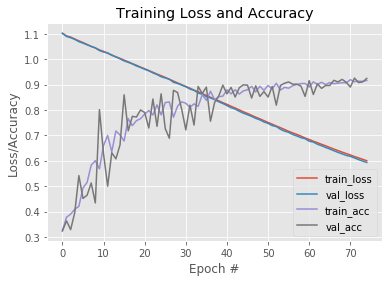

Done...


In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)

# Using the style of ggplot from a popular package in R for the data visualisation
plt.style.use("ggplot")

plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("output/nakano_model.png")
plt.show()
print("Done...")

# Saving the model

In [160]:
# save the nakano_model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
nakano_model.save("output/nakano_model.model")
f = open("output/label_binarizer.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


# Predict

In [22]:
# import the necessary packages
from keras.models import load_model
import argparse
import pickle
import cv2

# Import warnings filter
import warnings
warnings.filterwarnings("ignore")

You’ll need to explicitly import load_model  from keras.models  whenever you write a script to load a Keras model from disk. OpenCV will be used for annotation and display. The pickle  module will be used to load our label binarizer.

In [23]:
# Filter Warning
warnings.filterwarnings("ignore")

# load the input image and resize it to the target spatial dimensions
image = cv2.imread("images/16.jpg")
output = image.copy()
image = cv2.resize(image, (32, 32))
 
# scale the pixel values to [0, 1]
image = image.astype("float") / 255.0

# check to see if we should flatten the image and add a batch
# dimension
image = image.flatten()
image = image.reshape((1, image.shape[0]))

# load the model and label binarizer
print("[INFO] loading network and label binarizer...")
model = load_model("output/nakano_model.model")
lb = pickle.loads(open("output/label_binarizer.pickle", "rb").read())
 
# make a prediction on the image
preds = model.predict(image)
 
# find the class label index with the largest corresponding
# probability
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# draw the class label + probability on the output image
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# show the output image
cv2.imshow("Image", output)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window

[INFO] loading network and label binarizer...


<center><h1><b>References</b></h1><center>
    
    
1. Data Augmentation : https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

2. Keras with DL : https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/

3. Data Augment : https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec